In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Dataset

In [30]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
X = data.iloc[:,3:13].values 
y = data['Exited'].values

### Preprocessing

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [33]:
le_x = LabelEncoder()
X[:,1] = le_x.fit_transform(X[:,1])

le_x_2 = LabelEncoder()
X[:,2] = le_x_2.fit_transform(X[:,2])

ohe = ColumnTransformer([('ohe', OneHotEncoder(dtype=float),[1])], remainder='passthrough')

X = ohe.fit_transform(X)
X = X[:,1:]

### Spliting Train and Test Data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### XGBoost Implementation

In [35]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

[22:07:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Visualizing

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[2471,  324],
       [ 146,  359]], dtype=int64)

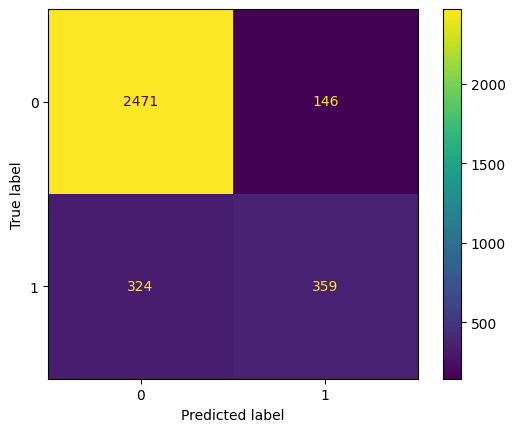

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)